<a href="https://colab.research.google.com/github/Bazyarmostafa/Data-Science-Projects/blob/master/Unsupervised_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import needed libraries:

In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth,KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import requests
from PIL import Image
from io import StringIO

In this section we import some datasets to examine:

In [2]:
#Titanic Dataset
path1="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/titanic.csv"


**Mean Shift Applied to the Titanic Dataset**

On April 15, 1912, the Titanic collided with an iceberg and sank. When the Titanic sank, it killed 1502 out of 2224 passengers and crew. In this section you will apply Mean-Shift clustering on features such as age, gender, class, etc. We will then determine if there is a relationship between survival and the different clusters.
<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>


In [253]:
data=requests.get(path1)
my_table=pd.read_csv(StringIO(data.text))
my_table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Preprocessing**


drop unnecessary columns:

In [268]:
x=my_table.drop(columns=["PassengerId","Name","Ticket","Cabin","Embarked"])


In [269]:
x.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0


In [289]:
age_mean=x["Age"].mean()
x["Age"].fillna(age_mean,inplace=True)
# x.loc[x['Sex']!='male','Sex']=0
# x.loc[x['Sex']=='male','Sex']=1
x["Sex"].replace("male",1,inplace=True)
x["Sex"].replace("female",0,inplace=True)
X=x.drop(columns=["Survived"])
# normalize:
X=X.apply(lambda X: (X-X.mean())/(X.std()+0.0000001), axis=0)
# X = (X - X.min()) / (X.max() - X.min())



In [291]:
# band=estimate_bandwidth(X,quantile=0.9,n_samples=2000)
band=estimate_bandwidth(X)
band
# band=4.279926929609758

2.3759872191771847

In [292]:
meanshift_model=MeanShift(bandwidth=band, bin_seeding=True)

In [293]:
meanshift_model.fit(X)

MeanShift(bandwidth=2.3759872191771847, bin_seeding=True)

In [294]:
np.unique(meanshift_model.labels_)
x["Labels"]=meanshift_model.labels_
xx=x.groupby("Labels").mean().sort_values(by="Survived",ascending=False)

In [295]:
xx

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Labels,,,,,,,
5,1.000000,1.000000,0.666667,35.333333,0.000000,0.333333,512.329200
4,0.740741,1.000000,0.296296,27.752527,0.851852,1.296296,197.723304
1,0.392857,2.821429,0.392857,9.701723,2.892857,1.446429,29.987427
0,0.373880,2.309859,0.686300,30.942901,0.271447,0.183099,24.064953
2,0.333333,2.800000,0.200000,37.800000,0.800000,4.000000,32.085553
3,0.000000,3.000000,0.571429,29.699118,8.000000,2.000000,69.550000
6,0.000000,1.000000,1.000000,61.000000,0.500000,3.000000,188.137500


<Axes: >

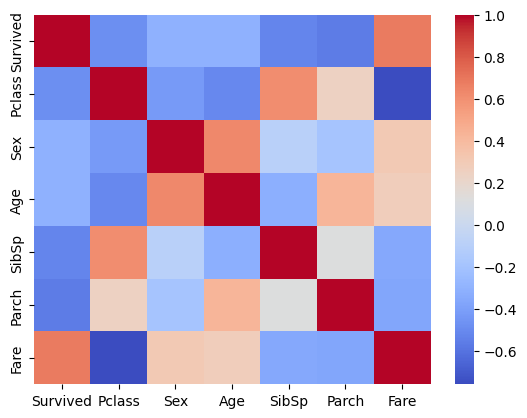

In [191]:
corelation_matrix= xx.corr()
corelation_matrix
sns.heatmap(corelation_matrix,cmap='coolwarm',fmt='.2f')

**Try Kmeans :**

In [296]:
kmean=KMeans(n_clusters=8,random_state=20,n_init=50)
kmean.fit(X)

KMeans(n_init=50, random_state=20)

In [297]:
kmean_label=kmean.labels_
# np.unique(kmean_label)
x2=x
x2["labels"]=kmean_label
# x2.drop(columns=["Labels"],inplace=True)


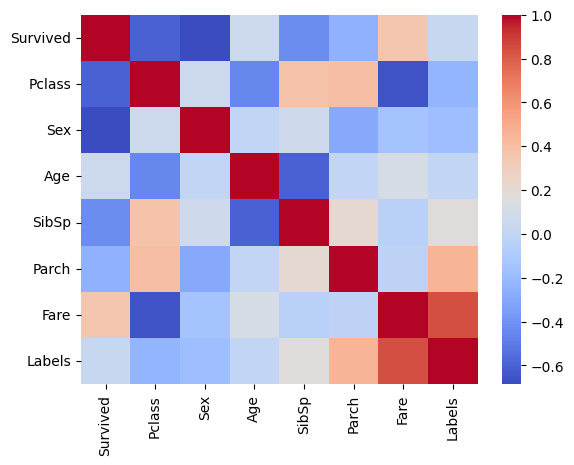

<Axes: >

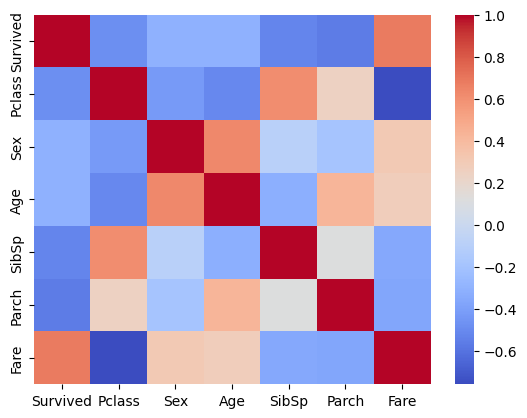

In [298]:
xx2=x2.groupby("labels").mean().sort_values(by="Survived",ascending=False)
sns.heatmap(xx2.corr(),cmap='coolwarm',fmt='.2f')
plt.show()
sns.heatmap(corelation_matrix,cmap='coolwarm',fmt='.2f')


In [299]:
xx2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Labels
labels,,,,,,,,
5,0.986667,1.013333,0.000000,36.723894,0.520000,0.253333,81.744500,0.240000
6,0.763158,2.289474,0.368421,13.423231,0.697368,1.592105,32.646379,0.526316
0,0.686667,2.640000,0.000000,28.695133,0.373333,0.133333,13.665669,0.013333
2,0.681818,1.000000,0.363636,30.745374,0.727273,1.136364,268.299436,4.227273
4,0.294964,1.230216,1.000000,43.066786,0.287770,0.129496,41.918795,0.071942
7,0.250000,2.916667,0.166667,39.916667,0.666667,4.333333,30.263192,2.000000
1,0.119681,2.819149,1.000000,28.454294,0.180851,0.050532,11.617650,0.000000
3,0.073171,3.000000,0.585366,13.236349,4.536585,1.609756,38.327849,1.341463
